# `dsolve` Tutorial

In [1]:
sys.path.append(r'C:\Users\MBBar\OneDrive\Escritorio\git_local\dsolve')
from solvers import Klein
import numpy as np

## AR(1)

System with 1 stable eigenvalues and 1 pre-determined variables.


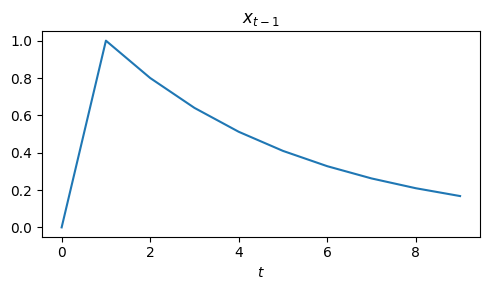

In [2]:
eq = ['x_{t}=\rho*x_{t-1}+\sigma*eps_{t}']  # define the law of motion of x_t
calibration = {'\rho':0.8,'\sigma':1}      # give numerical values to parameters.
system = Klein(eq, x='x_{t-1}', z='eps_{t}', calibration=calibration)
system.system_solution
mit_shock = system.simulate(x0 = 0, z = {'eps_{t}':np.array([1,0,0,0,0,0,0,0,0,0])})
mit_shock.plot('x_{t-1}')

## 2 equations NK model

$$\pi_t=\beta E[\pi_{t+1}]+\kappa y_{t}+u_t$$
$$y_t=E[y_{t+1}]+(1-\phi)E[\pi_{t+1}]+u_t$$

In [3]:
from expressions import DynamicExpression

DynamicExpression('E\pi_{t+1}+1')

E_{t}[\pi_{t+1}]+1

System with 1 stable eigenvalues and 1 pre-determined variables.


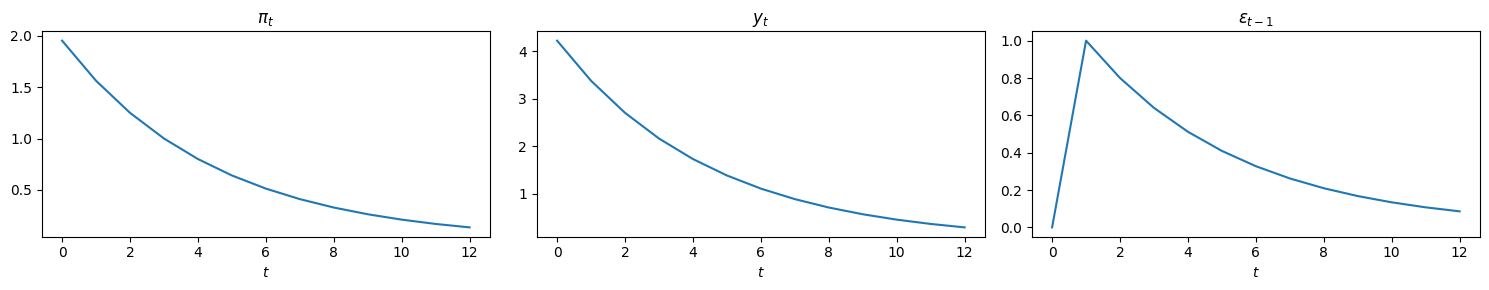

In [4]:
eq=[
    '\pi_{t}=\beta*E\pi_{t+1}+kappa*y_{t}+u_{t}',
    'y_{t}=Ey_{t+1}+(1-phi)*E[\pi_{t+1}]+\epsilon_{t}',
    '\epsilon_{t} = rho_v*\epsilon_{t-1}+v_{t}'
]
calibration = {'\\beta':0.98,'kappa':0.1,'phi':1.1,'rho_v':0.8}
system = Klein(eq, x='\epsilon_{t-1}', p='\pi_{t},y_{t}', z='v_{t},u_{t}', calibration=calibration)
mit_shock = system.simulate(x0=0, z = {'v_{t}':np.array([1,0,0,0,0,0,0,0,0,0,0,0,0])})
mit_shock .plot('\pi_{t}, y_t, \epsilon_{t-1}')